In [1]:
import gc
import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.datasets import make_regression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model.stochastic_gradient import SGDRegressor
from sklearn.svm.classes import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble.forest import RandomForestRegressor

### Prediction latencies

https://scikit-learn.org/stable/auto_examples/applications/plot_prediction_latency.html#sphx-glr-auto-examples-applications-plot-prediction-latency-py

In [26]:
def generate_dataset(n_samples, n_features, noise=0.1):
    
    print("generating dataset...", n_features)

    X, y, coef = make_regression(n_samples=n_samples,
                                 n_features=n_features, 
                                 noise=noise, coef=True)

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=5)

    X_scaler = StandardScaler()
    X_train = X_scaler.fit_transform(X_train)
    X_test = X_scaler.transform(X_test)

    y_scaler = StandardScaler()
    y_train = y_scaler.fit_transform(y_train[:, None])[:, 0]
    y_test = y_scaler.transform(y_test[:, None])[:, 0]

    gc.collect()
    
    print('dataset generation complete...')
    
    return X_train, y_train, X_test, y_test

In [37]:
def bulk_predict(X_test, y_test, model):
    
    prediction_latencies = []
    
    for i in range(20):
        start = time.time()
        y_pred = model.predict(X_test)
        
        prediction_latencies.append(time.time() - start)
        
   
    return np.mean(np.array(prediction_latencies))

In [38]:
def build_and_predict(model):
    
    prediction_latencies_dict = {}
    
    for num_features in range(100, 1001, 100):
        X_train, y_train, X_test, y_test = generate_dataset(10000, num_features)
        
        model.fit(X_train, y_train)
        
        prediction_latencies_dict[str(num_features)] =  \
            bulk_predict(X_test, y_test, model)
    
    return prediction_latencies_dict

In [39]:
linear_model = LinearRegression()

lasso_model = Lasso(alpha=0.8)

sgd_model = SGDRegressor(penalty='elasticnet', alpha=0.01,
                         l1_ratio=0.25, tol=1e-4)

sv_model = SVR(kernel='rbf', gamma='scale')

dt_model = DecisionTreeRegressor(max_depth=10)

rf_model = RandomForestRegressor(n_estimators=20)

In [40]:
model_and_num_features = {}

In [41]:
model_and_num_features['linear'] = build_and_predict(linear_model)

generating dataset... 100
dataset generation complete...
generating dataset... 200
dataset generation complete...
generating dataset... 300
dataset generation complete...
generating dataset... 400
dataset generation complete...
generating dataset... 500
dataset generation complete...
generating dataset... 600
dataset generation complete...
generating dataset... 700
dataset generation complete...
generating dataset... 800
dataset generation complete...
generating dataset... 900
dataset generation complete...
generating dataset... 1000
dataset generation complete...


In [42]:
model_and_num_features['linear']

{'100': 0.0007286787033081055,
 '1000': 0.0035309076309204103,
 '200': 0.0004744529724121094,
 '300': 0.0013517141342163086,
 '400': 0.0016767024993896485,
 '500': 0.00171889066696167,
 '600': 0.002046799659729004,
 '700': 0.002353966236114502,
 '800': 0.0026030898094177245,
 '900': 0.0030367136001586913}

In [49]:
def plot_prediction_latencies(num_features_latencies):
    
    plt.figure(figsize=(10, 8))

    plt.plot(list(num_features_latencies.keys()),
             list(num_features_latencies.values()))

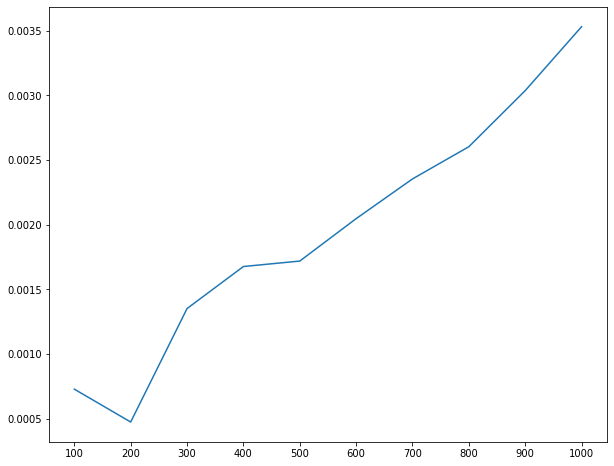

In [50]:
plot_prediction_latencies(model_and_num_features['linear'])

generating dataset... 100
dataset generation complete...
generating dataset... 200
dataset generation complete...
generating dataset... 300
dataset generation complete...
generating dataset... 400
dataset generation complete...
generating dataset... 500
dataset generation complete...
generating dataset... 600
dataset generation complete...
generating dataset... 700
dataset generation complete...
generating dataset... 800
dataset generation complete...
generating dataset... 900
dataset generation complete...
generating dataset... 1000
dataset generation complete...


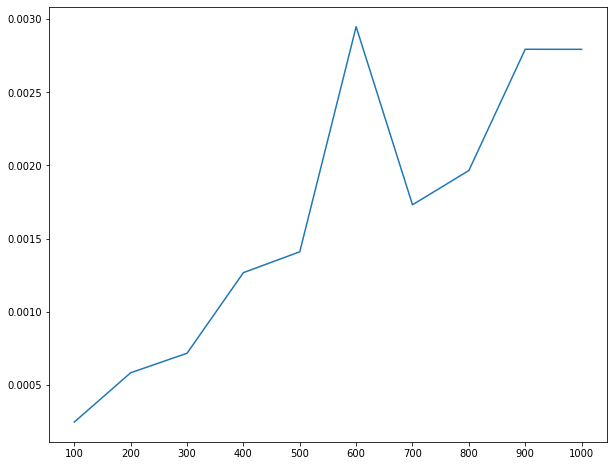

In [51]:
model_and_num_features['lasso'] = build_and_predict(lasso_model)

plot_prediction_latencies(model_and_num_features['lasso'])

generating dataset... 100
dataset generation complete...
generating dataset... 200
dataset generation complete...
generating dataset... 300
dataset generation complete...
generating dataset... 400
dataset generation complete...
generating dataset... 500
dataset generation complete...
generating dataset... 600
dataset generation complete...
generating dataset... 700
dataset generation complete...
generating dataset... 800
dataset generation complete...
generating dataset... 900
dataset generation complete...
generating dataset... 1000
dataset generation complete...


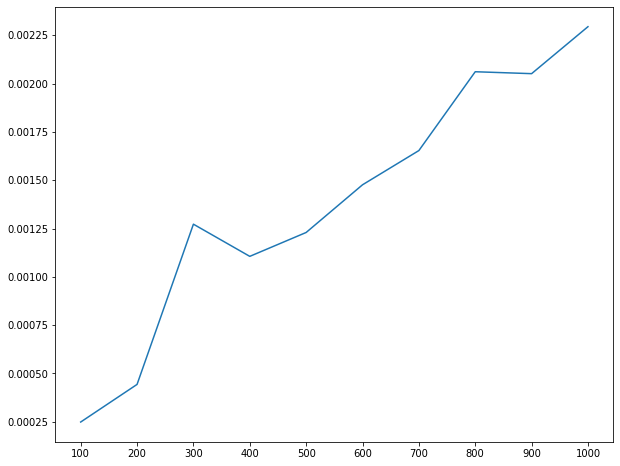

In [56]:
model_and_num_features['sgd'] = build_and_predict(sgd_model)

plot_prediction_latencies(model_and_num_features['sgd'])

generating dataset... 100
dataset generation complete...
generating dataset... 200
dataset generation complete...
generating dataset... 300
dataset generation complete...
generating dataset... 400
dataset generation complete...
generating dataset... 500
dataset generation complete...
generating dataset... 600
dataset generation complete...
generating dataset... 700
dataset generation complete...
generating dataset... 800
dataset generation complete...
generating dataset... 900
dataset generation complete...
generating dataset... 1000
dataset generation complete...


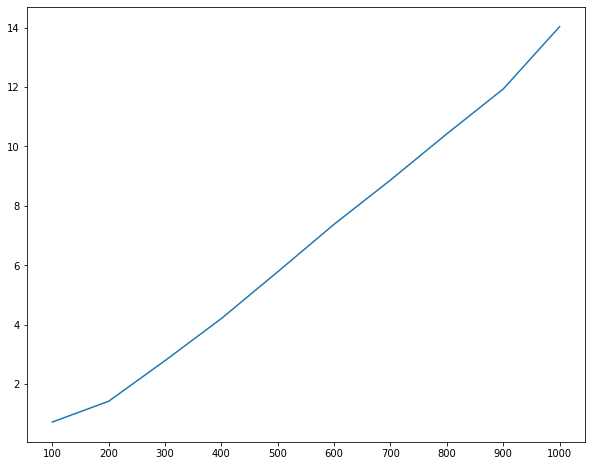

In [58]:
model_and_num_features['sv'] = build_and_predict(sv_model)

plot_prediction_latencies(model_and_num_features['sv'])

generating dataset... 100
dataset generation complete...
generating dataset... 200
dataset generation complete...
generating dataset... 300
dataset generation complete...
generating dataset... 400
dataset generation complete...
generating dataset... 500
dataset generation complete...
generating dataset... 600
dataset generation complete...
generating dataset... 700
dataset generation complete...
generating dataset... 800
dataset generation complete...
generating dataset... 900
dataset generation complete...
generating dataset... 1000
dataset generation complete...


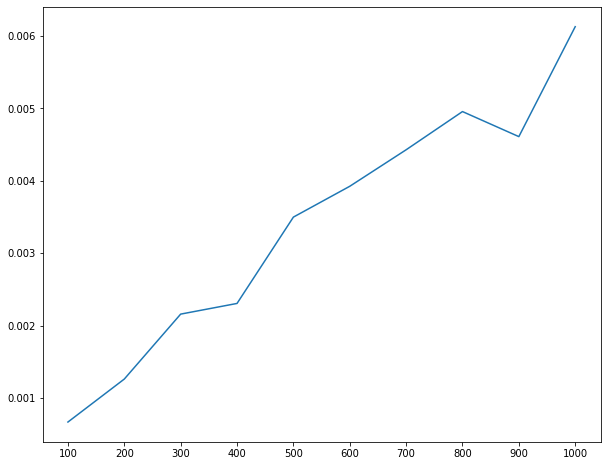

In [59]:
model_and_num_features['dt'] = build_and_predict(dt_model)

plot_prediction_latencies(model_and_num_features['dt'])

generating dataset... 100
dataset generation complete...
generating dataset... 200
dataset generation complete...
generating dataset... 300
dataset generation complete...
generating dataset... 400
dataset generation complete...
generating dataset... 500
dataset generation complete...
generating dataset... 600
dataset generation complete...
generating dataset... 700
dataset generation complete...
generating dataset... 800
dataset generation complete...
generating dataset... 900
dataset generation complete...
generating dataset... 1000
dataset generation complete...


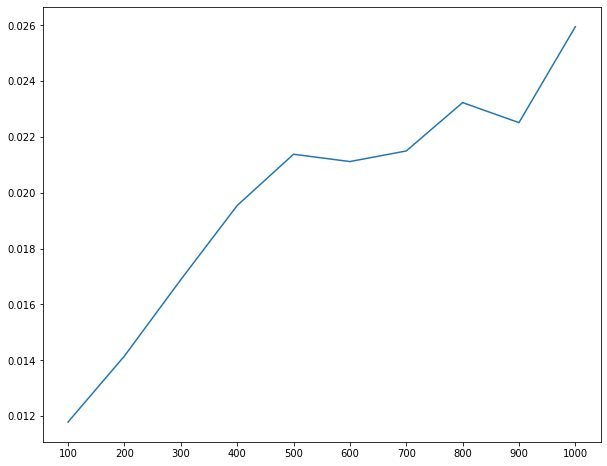

In [60]:
model_and_num_features['rf'] = build_and_predict(rf_model)

plot_prediction_latencies(model_and_num_features['rf'])